In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv("accident_train.csv")
df.head()

,id,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy
0,0,10-24,1840.914,alive,none,belted,1,f,19,2002,1993,unavail,driver,0
1,1,25-39,20.118,dead,airbag,none,1,m,60,2002,1998,deploy,driver,1
2,2,10-24,91.489,alive,airbag,belted,1,f,30,1999,1996,deploy,driver,1
3,3,25-39,63.971,alive,none,belted,0,f,62,1998,1987,unavail,pass,0
4,4,55+,5.531,dead,airbag,belted,1,f,19,1997,1996,deploy,pass,1


In [5]:
df.describe()

,id,weight,frontal,age_O_focc,yearacc,year_veh,deploy
count,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000,2832.000000
mean,1415.500000,322.858374,0.585805,39.683969,1999.515890,1992.404661,0.334746
std,817.672306,1348.632331,0.492669,19.484727,1.731264,5.824414,0.471985
min,0.000000,0.000000,0.000000,16.000000,1997.000000,1963.000000,0.000000
25%,707.750000,25.008750,0.000000,23.000000,1998.000000,1989.000000,0.000000
50%,1415.500000,52.597000,1.000000,35.000000,1999.000000,1993.000000,0.000000
75%,2123.250000,194.176000,1.000000,52.000000,2001.000000,1997.000000,1.000000
max,2831.000000,47463.090000,1.000000,97.000000,2002.000000,2003.000000,1.000000


In [6]:
len(df[df.dead=="dead"])

944

In [7]:
len(df[df.dead=="alive"])

1888

In [8]:
df.occ_role.replace(['driver', 'pass'], [1,0], inplace = True) 
df.seatbelt.replace(['belted', 'none'], [1,0], inplace = True) 
df.dead.replace(['dead', 'alive'], [1,0], inplace = True) 
df.airbag.replace(['airbag', 'none'], [1,0], inplace = True) 
df.sex.replace(['f', 'm'], [1,0], inplace = True) 
df.abcat.replace(['unavail', 'deploy', 'nodeploy'], [2,1,0], inplace = True) 

In [9]:
df.head()

,id,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy
0,0,10-24,1840.914,0,0,1,1,1,19,2002,1993,2,1,0
1,1,25-39,20.118,1,1,0,1,0,60,2002,1998,1,1,1
2,2,10-24,91.489,0,1,1,1,1,30,1999,1996,1,1,1
3,3,25-39,63.971,0,0,1,0,1,62,1998,1987,2,0,0
4,4,55+,5.531,1,1,1,1,1,19,1997,1996,1,0,1


In [10]:
df.groupby('dvcat').describe()

id                                  ... deploy               
          count         mean         std    min  ...    25%  50%  75%  max
dvcat                                            ...                      
1-9km/h    55.0  1374.745455  758.732696  169.0  ...    0.0  0.0  0.0  1.0
10-24    1048.0  1384.074427  818.528890    0.0  ...    0.0  0.0  1.0  1.0
25-39     825.0  1459.135758  803.666894    1.0  ...    0.0  0.0  1.0  1.0
40-54     474.0  1411.569620  829.298249    6.0  ...    0.0  0.0  1.0  1.0
55+       430.0  1417.916279  836.235940    4.0  ...    0.0  0.0  1.0  1.0

[5 rows x 104 columns]

In [11]:
df.dvcat.replace(['1-9km/h', '10-24', '25-39', '40-54', '55+'], [5, 17, 32, 47, 62], inplace = True) 

In [12]:
df.head()

,id,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy
0,0,17,1840.914,0,0,1,1,1,19,2002,1993,2,1,0
1,1,32,20.118,1,1,0,1,0,60,2002,1998,1,1,1
2,2,17,91.489,0,1,1,1,1,30,1999,1996,1,1,1
3,3,32,63.971,0,0,1,0,1,62,1998,1987,2,0,0
4,4,62,5.531,1,1,1,1,1,19,1997,1996,1,0,1


In [13]:
df["veh_old"]=df["yearacc"]-df["year_veh"]
df.head()

,id,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy,veh_old
0,0,17,1840.914,0,0,1,1,1,19,2002,1993,2,1,0,9
1,1,32,20.118,1,1,0,1,0,60,2002,1998,1,1,1,4
2,2,17,91.489,0,1,1,1,1,30,1999,1996,1,1,1,3
3,3,32,63.971,0,0,1,0,1,62,1998,1987,2,0,0,11
4,4,62,5.531,1,1,1,1,1,19,1997,1996,1,0,1,1


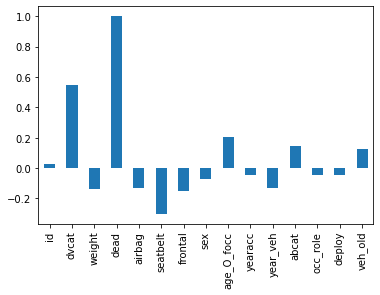

In [14]:
df.corr()["dead"].plot(kind="bar")

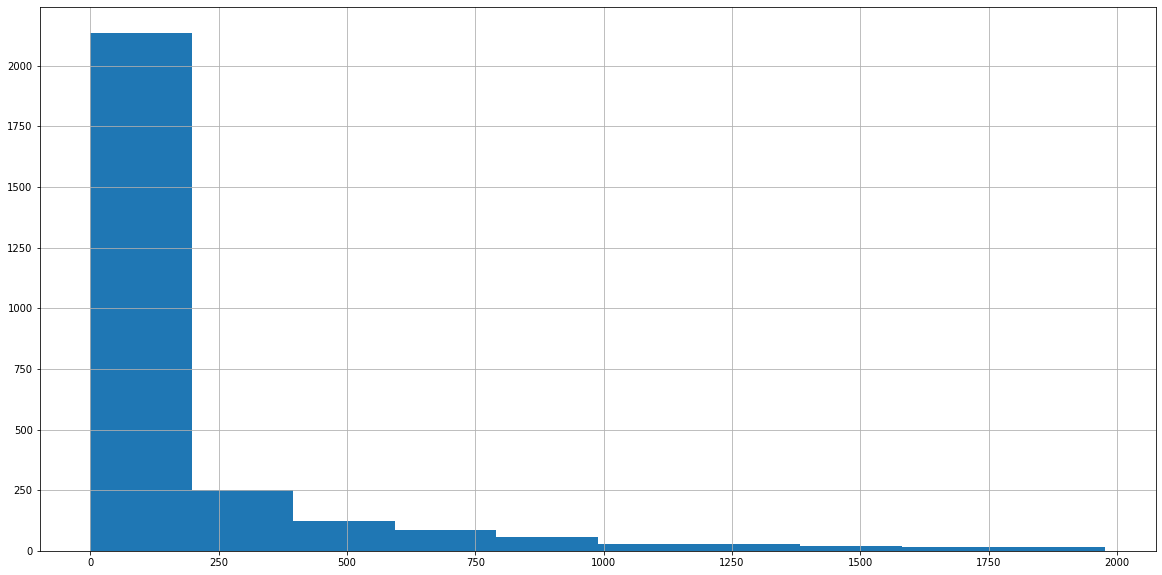

In [15]:
from scipy.stats import norm
param = norm.fit(df["weight"])
df[df["weight"]<2000]["weight"].hist(figsize=(20, 10))

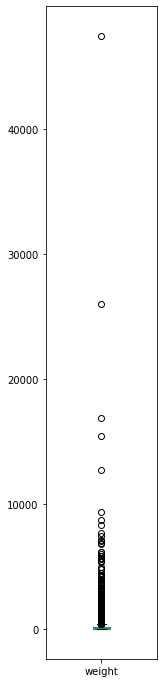

In [16]:
df["weight"].plot.box(figsize=(2,12))

In [17]:
df["weight"]=np.log(df["weight"]+0.01)

In [18]:
df[(df["weight"] > 0) & (df["weight"]<1)]

,id,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy,veh_old
494,494,62,0.009950,1,1,0,1,0,52,2002,1999,1,1,1,3
1018,1018,17,0.064851,1,0,1,1,0,24,1999,1992,2,0,0,7
1239,1239,32,0.858238,1,0,1,1,1,60,2001,1990,2,0,0,11
1285,1285,17,0.009950,0,1,1,0,0,71,2002,2000,0,1,0,2
1532,1532,62,0.880456,1,0,0,0,1,33,1997,1985,2,1,0,12
1785,1785,32,0.009950,0,1,1,0,0,26,2002,1995,0,1,0,7
1875,1875,62,0.009950,1,1,0,1,1,44,2002,2000,1,1,1,2
2030,2030,62,0.447886,1,0,0,0,0,49,2002,1989,2,1,0,13


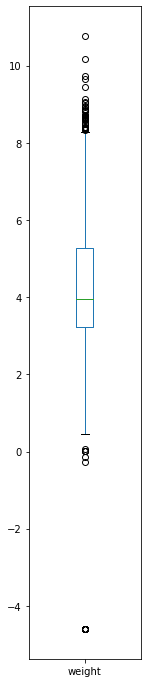

In [19]:
df["weight"].plot.box(figsize=(2,12))

In [20]:
df.head()

,id,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy,veh_old
0,0,17,7.518023,0,0,1,1,1,19,2002,1993,2,1,0,9
1,1,32,3.002112,1,1,0,1,0,60,2002,1998,1,1,1,4
2,2,17,4.516328,0,1,1,1,1,30,1999,1996,1,1,1,3
3,3,32,4.158586,0,0,1,0,1,62,1998,1987,2,0,0,11
4,4,62,1.712175,1,1,1,1,1,19,1997,1996,1,0,1,1


In [21]:
from sklearn.preprocessing import StandardScaler
df_std = df.copy()
col_names = ['weight', 'dvcat', 'yearacc', 'year_veh', 'age_O_focc', 'veh_old']
features = df_std[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
df_std[col_names] = features
df_std.head()

,id,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat,occ_role,deploy,veh_old
0,0,-0.971798,1.908209,0,0,1,1,1,-1.061735,1.435107,0.102232,2,1,0,0.339199
1,1,-0.060194,-0.704679,1,1,0,1,0,1.042849,1.435107,0.960840,1,1,1,-0.558736
2,2,-0.971798,0.171441,0,1,1,1,1,-0.497091,-0.298037,0.617397,1,1,1,-0.738323
3,3,-0.060194,-0.035547,0,0,1,0,1,1.145511,-0.875752,-0.928096,2,0,0,0.698372
4,4,1.763014,-1.451031,1,1,1,1,1,-1.061735,-1.453467,0.617397,1,0,1,-1.097497


In [22]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.6MB/s 


In [23]:

import category_encoders as ce

list_cols = ['abcat']
ce_ohe = ce.OneHotEncoder(cols=list_cols)
df_std_onehot = ce_ohe.fit_transform(df_std)
df_std_onehot.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,id,dvcat,weight,dead,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat_1,abcat_2,abcat_3,occ_role,deploy,veh_old
0,0,-0.971798,1.908209,0,0,1,1,1,-1.061735,1.435107,0.102232,1,0,0,1,0,0.339199
1,1,-0.060194,-0.704679,1,1,0,1,0,1.042849,1.435107,0.960840,0,1,0,1,1,-0.558736
2,2,-0.971798,0.171441,0,1,1,1,1,-0.497091,-0.298037,0.617397,0,1,0,1,1,-0.738323
3,3,-0.060194,-0.035547,0,0,1,0,1,1.145511,-0.875752,-0.928096,1,0,0,0,0,0.698372
4,4,1.763014,-1.451031,1,1,1,1,1,-1.061735,-1.453467,0.617397,0,1,0,0,1,-1.097497


In [26]:
len(df_std_onehot)

2832

In [51]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_std_onehot, train_size=0.9)

In [58]:
y_train = train["dead"]
x_train = train.drop(["dead", "id"], axis=1)

In [59]:
y_train.head()

755     0
153     0
1456    0
2313    0
1192    0
Name: dead, dtype: int64

In [60]:
x_train.head()

,dvcat,weight,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat_1,abcat_2,abcat_3,occ_role,deploy,veh_old
755,-0.060194,-0.954911,1,1,0,1,-0.907741,0.279678,0.789118,0,0,1,0,0,-0.738323
153,-0.971798,-0.785201,1,1,0,0,-1.061735,0.279678,0.960840,0,1,0,0,1,-0.917910
1456,-0.060194,0.166264,1,1,1,1,-0.702416,0.857392,0.789118,0,1,0,1,1,-0.558736
2313,-0.060194,-0.495303,0,0,0,0,-1.010404,-0.875752,-2.473589,1,0,0,0,0,2.314655
1192,-0.971798,0.291985,1,1,0,1,-1.061735,-0.875752,0.617397,0,0,1,1,0,-0.917910


In [61]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE()
resumpled_x,resumpled_y = sm.fit_sample(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [62]:
resumpled_x.shape, resumpled_y.shape

((3408, 15), (3408,))

In [63]:
df_output = pd.DataFrame(resumpled_x, columns=train.drop(["dead", "id"], axis=1).columns)
df_output["dead"] = resumpled_y

df_output.head()

,dvcat,weight,airbag,seatbelt,frontal,sex,age_O_focc,yearacc,year_veh,abcat_1,abcat_2,abcat_3,occ_role,deploy,veh_old,dead
0,-0.060194,-0.954911,1.0,1.0,0.0,1.0,-0.907741,0.279678,0.789118,0.0,0.0,1.0,0.0,0.0,-0.738323,0
1,-0.971798,-0.785201,1.0,1.0,0.0,0.0,-1.061735,0.279678,0.960840,0.0,1.0,0.0,0.0,1.0,-0.917910,0
2,-0.060194,0.166264,1.0,1.0,1.0,1.0,-0.702416,0.857392,0.789118,0.0,1.0,0.0,1.0,1.0,-0.558736,0
3,-0.060194,-0.495303,0.0,0.0,0.0,0.0,-1.010404,-0.875752,-2.473589,1.0,0.0,0.0,0.0,0.0,2.314655,0
4,-0.971798,0.291985,1.0,1.0,0.0,1.0,-1.061735,-0.875752,0.617397,0.0,0.0,1.0,1.0,0.0,-0.917910,0


In [64]:
df_output.to_csv("output.csv")